1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#null hypothesis: the number of hurricanes in 2005 follows a Poisson distribution
x0 = 15
mu = 6.3
sigma = mu**0.5
Z = abs(x0 - mu) / sigma
print("Z =", Z)
pvalue = (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)
alpha= (1. - stats.norm.cdf(3))
print("alpha =", alpha)
if pvalue<alpha:
    print("The number of hurricanes in 2005 was abnormal in comparison to the historic average.")
else:
    print("The number of hurricanes in 2005 is not different from the historic average.")

Z = 3.4661629670697414
p-value = 0.00026397158691493505
alpha = 0.0013498980316301035
The number of hurricanes in 2005 was abnormal in comparison to the historic average.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [61]:
import numpy as np
from scipy import stats

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
#null hypothesis: there are no significant changes
mean_pre=np.mean(pre)
mean_post=np.mean(post)
var_pre=np.var(pre, ddof=1)
var_post=np.var(post, ddof=1)
var=((var_pre+var_post)/2)**0.5
T=(mean_pre - mean_post)/(var*((2/len(pre))**0.5))
print("T is:", T)
pvalue = stats.t.cdf(T, len(pre)+len(post) - 2) + (1. - stats.t.cdf(-T, len(pre)+len(post) - 2))
print("The p-value is: ", pvalue)
if pvalue < 0.05:
    print("The change in blood pressure is statistically significant.")
else:
    print("The change in blood pressure in not statistically significant.")

T is: -3.786997938137629
The p-value is:  0.0013499418313276546
The change in blood pressure is statistically significant.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


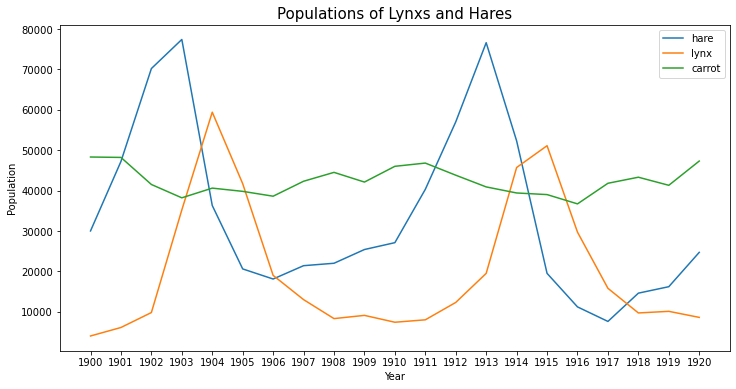

Peak frequency for hares: 0.09523809523809523
From the frequency, it is found that the period of the hares is 10.5 years.
From the filterd signal, it is found that the period of the hares is of about [10] years.
Peak frequency for lynxs: 0.09523809523809523
From the frequency, it is found that the period of the lynxs is 10.5 years.
From the filterd signal, it is found that the period of the lynxs is of about [11] years.
Peak frequency for carrots: 0.09523809523809523
From the frequency, it is found that the period of the carrots is 10.5 years.
From the filterd signal, it is found that the period of the carrots is of about [10] years.


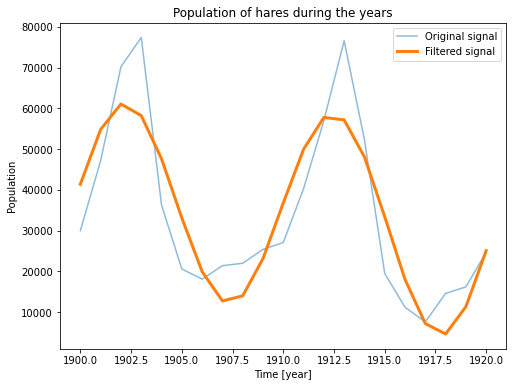

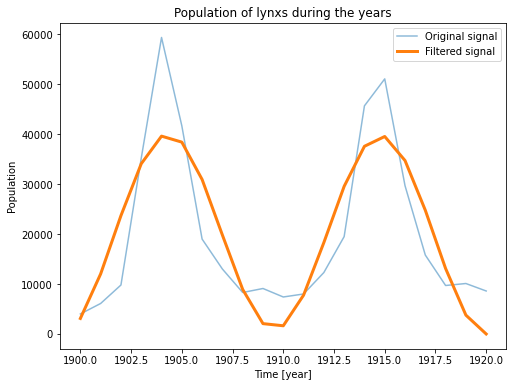

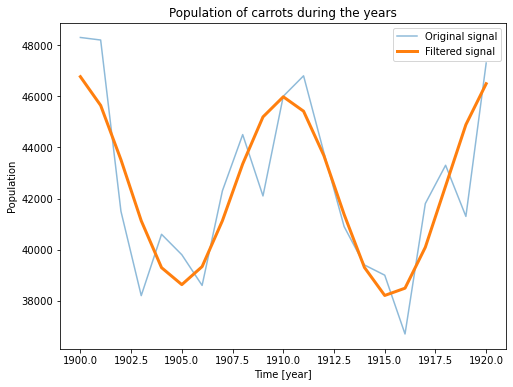

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import fftpack
import numpy as np
from scipy import optimize
import math

df = pd.read_csv('populations.txt', sep='\t')
display(df)

fig, ax = plt.subplots(figsize=(12, 6))
c=["hare","lynx","carrot"]
for i in c:
    ax.plot(df['# year'], df[i], label=str(i))
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Populations of Lynxs and Hares', fontsize=15)
ax.set_xticks(df['# year'])
ax.legend()
plt.show()

for i in c:
    sig_fft = fftpack.fft(df[i].values)
    power = np.abs(sig_fft)
    sample_freq = fftpack.fftfreq(len(df[i]))
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    powes = power[pos_mask]
    peak_freq = freqs[powes.argmax()]
    print("Peak frequency for "+str(i)+"s:", peak_freq)
    print("From the frequency, it is found that the period of the "+str(i)+"s is",1/peak_freq,"years.")
    high_freq_fft = sig_fft.copy()
    high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
    filtered_sig = fftpack.ifft(high_freq_fft)
    real_filtered_signal = np.real(filtered_sig)
    max1=real_filtered_signal.max()
    max2=np.partition(real_filtered_signal.flatten(), -2)[-2]
    index1,=np.where(np.isclose(real_filtered_signal, max1))
    index2,=np.where(np.isclose(real_filtered_signal, max2))
    if np.abs(index1-index2)<2 or np.abs(index1-index2)>15:
        max2=np.partition(real_filtered_signal.flatten(), -3)[-3]
        index2,=np.where(np.isclose(real_filtered_signal, max2))
    times=df["# year"].values
    T=np.abs(times[index1]-times[index2])
    print("From the filterd signal, it is found that the period of the "+str(i)+"s is of about "+str(T)+" years.")
    plt.figure(figsize=(8, 6))
    plt.plot(times, df[i], alpha=0.5, label='Original signal')
    plt.plot(times, real_filtered_signal, linewidth=3, label='Filtered signal')
    plt.xlabel('Time [year]')
    plt.ylabel('Population')
    plt.title("Population of "+str(i)+"s during the years", fontsize=12)
    plt.legend(loc='best')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.


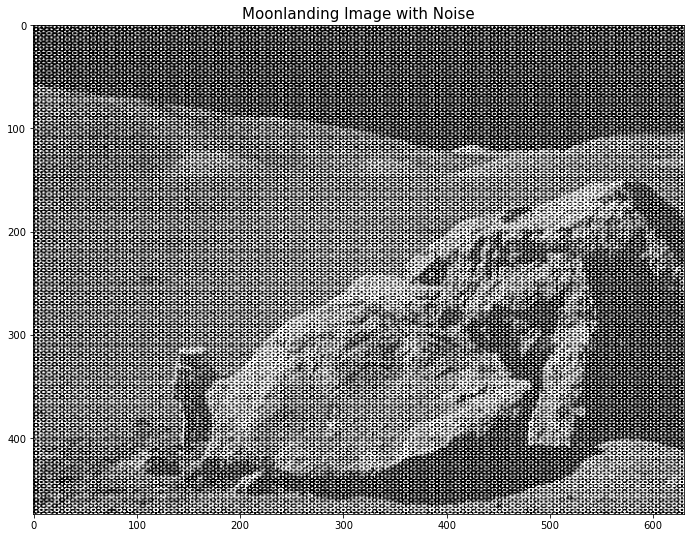

In [8]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from scipy import fftpack

im = plt.imread('moonlanding.png').astype(float)
fig, ax = plt.subplots(figsize=(18, 9))
ax.set_title('Moonlanding Image with Noise', fontsize=15)
plt.imshow(im, cmap='gray')

* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```


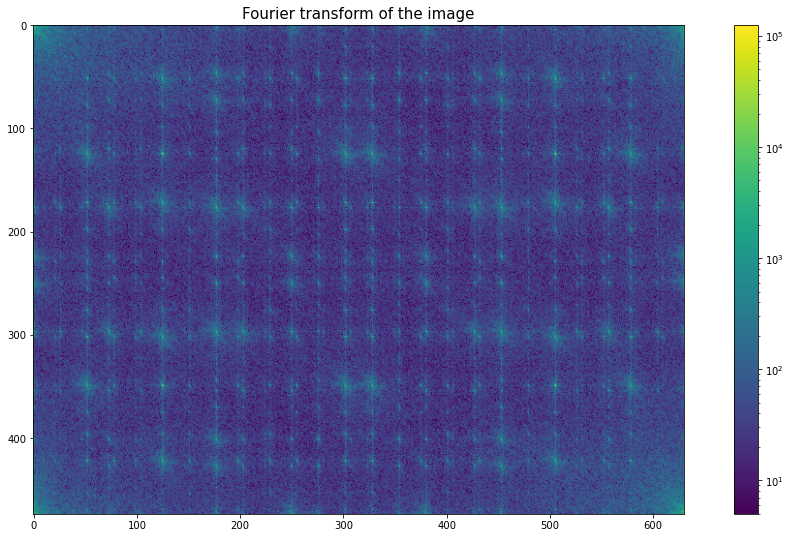

In [9]:
from matplotlib.colors import LogNorm

im_fft = fftpack.fft2(im)
fig, ax = plt.subplots(figsize=(18, 9))
plot = ax.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
fig.colorbar(plot)
ax.set_title('Fourier transform of the image', fontsize=15)
plt.show()

* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.


The keeping fraction of the original image is: 0.09
Trying to change this parameter, the results are the following:
for bigger ones, an uncleared image, the noise is not completely removed;
for smaller ones, the image is blurred, so not only the noise is removed but also part of the useful information.


Text(0.5, 1.0, 'Filtered Spectrum')

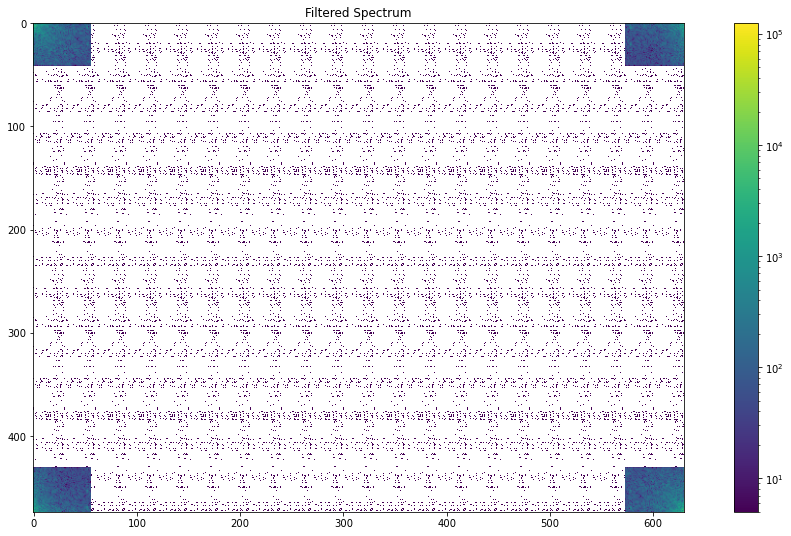

In [15]:
#I create a copy of the array and then I cancel all the rows and columns outside a keeping fraction

im_fft2 = im_fft.copy()
r, c = im_fft2.shape
keeping_fraction = 0.09
print("The keeping fraction of the original image is:", keeping_fraction)
print("Trying to change this parameter, the results are the following:\nfor bigger ones, an uncleared image, the noise is not completely removed;\nfor smaller ones, the image is blurred, so not only the noise is removed but also part of the useful information.")
im_fft2[int(r*keeping_fraction):int(r*(1-keeping_fraction))] = 0
im_fft2[:, int(c*keeping_fraction):int(c*(1-keeping_fraction))] = 0

fig, ax = plt.subplots(figsize=(18, 9))
plt.imshow(np.abs(im_fft2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Moonlanding Image Without Noise')

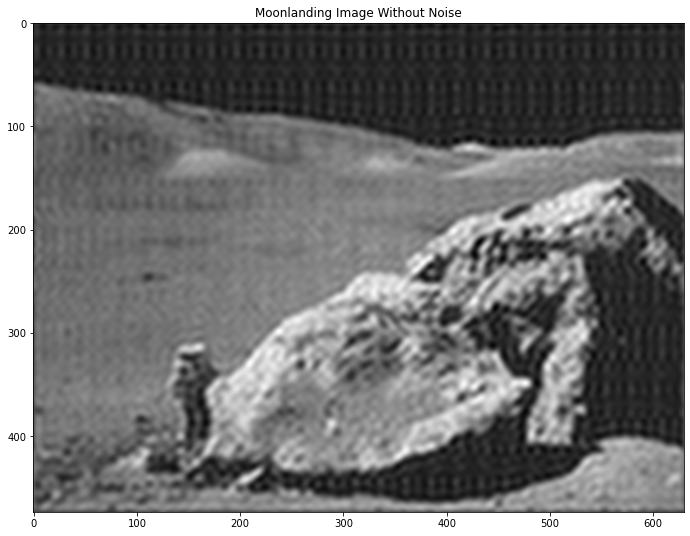

In [16]:
im_cleaned = fftpack.ifft2(im_fft2).real

fig, ax = plt.subplots(figsize=(18, 9))
plt.imshow(im_cleaned, cmap='gray')
plt.title('Moonlanding Image Without Noise')